# Linear Regression - California Housing Dataset

## Overview
Linear Regression is a simple algorithm for predicting a continuous target variable.  
We use it here to predict **housing prices** in California based on multiple features.  

This notebook includes:
- Data loading and preprocessing
- Training a Linear Regression model
- Evaluation and visualization
- Inline testing to ensure correctness and reproducibility


# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 2. Load Dataset

In [2]:
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target.values.reshape(-1,1)

X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# 3. Preprocessing

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 4. Train Linear Regression Model

In [4]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")


Test MSE: 0.5559
Test R²: 0.5758


# 5. Visualization

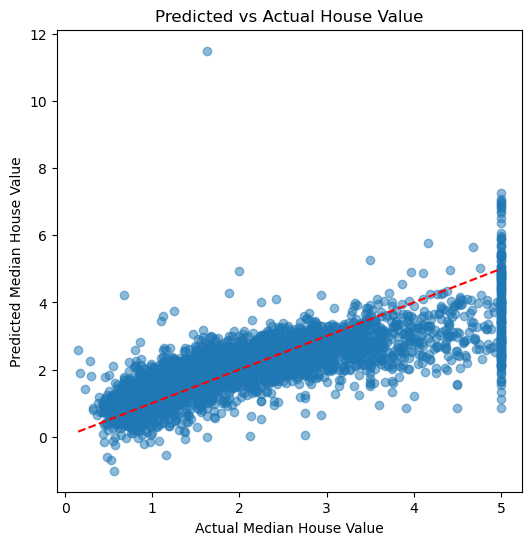

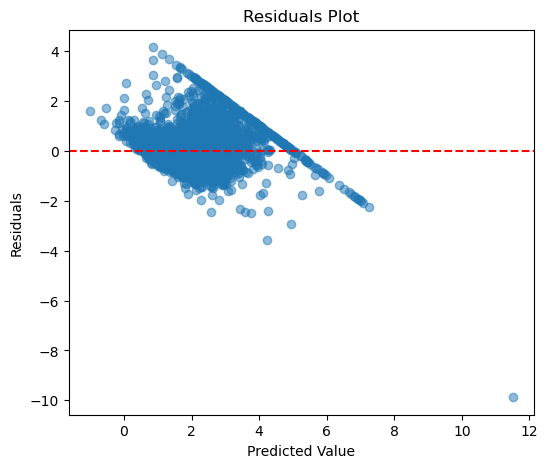

In [5]:
# Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs Actual House Value")
plt.show()

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


# 6. Testing

In [6]:
# 1. Shapes
assert X_train_scaled.shape[0] == y_train.shape[0], "Train sample count mismatch"
assert X_test_scaled.shape[0] == y_test.shape[0], "Test sample count mismatch"
assert X_train_scaled.shape[1] == X_test_scaled.shape[1], "Feature count mismatch"

# 2. Predictions
y_pred = model.predict(X_test_scaled)
assert y_pred.shape == y_test.shape, "Prediction shape mismatch"

# 3. Metrics sanity
assert mse > 0, "MSE must be positive"
assert -1 <= r2 <= 1, "R² must be between -1 and 1"

# 4. Reproducibility
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(X_test_scaled)
np.testing.assert_array_almost_equal(y_pred, y_pred2, decimal=6)

print("All tests passed ✅")


All tests passed ✅


# 7. Summary & Discussion
- Linear Regression captures general trends in housing prices with reasonable accuracy.
- R² indicates the proportion of variance explained by the model.
- Residuals show some heteroscedasticity, suggesting that more complex models could improve predictions.
- This notebook includes inline testing for correctness and reproducibility.
